In [6]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pickle
import scipy.stats
from tqdm.notebook import tqdm
from sklearn.decomposition import IncrementalPCA 
from helpers.data_generator import process_data
import seaborn as sns

In [7]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib_colors = [(0.1215, 0.4667, 0.7058), # blue
                     (1.0000, 0.4980, 0.0549), # orange
                     (0.1725, 0.6275, 0.1725), # green
                     (0.8392, 0.1529, 0.1568), # red
                     (0.5804, 0.4039, 0.7412), # violet
                     (0.4980, 0.4980, 0.4980), # grey
                     (0.0902, 0.7450, 0.8117)] # cyan

matlab_colors=[(0.0000, 0.4470, 0.7410), # blue
               (0.8500, 0.3250, 0.0980), # reddish orange
               (0.9290, 0.6940, 0.1250), # yellow
               (0.4940, 0.1840, 0.5560), # purple
               (0.4660, 0.6740, 0.1880), # light green
               (0.3010, 0.7450, 0.9330), # cyan
               (0.6350, 0.0780, 0.1840)] # dark red

colorblind_colors = [(0.0000, 0.4500, 0.7000), # blue
                     (0.8359, 0.3682, 0.0000), # vermillion
                     (0.0000, 0.6000, 0.5000), # bluish green
                     (0.9500, 0.9000, 0.2500), # yellow
                     (0.3500, 0.7000, 0.9000), # sky blue
                     (0.8000, 0.6000, 0.7000), # reddish purple
                     (0.9000, 0.6000, 0.0000)] # orange

dashes = [(1.0, 0.0, 0.0, 0.0, 0.0, 0.0), # solid
          (3.7, 1.6, 0.0, 0.0, 0.0, 0.0), # dashed
          (1.0, 1.6, 0.0, 0.0, 0.0, 0.0), # dotted
          (6.4, 1.6, 1.0, 1.6, 0.0, 0.0), # dot dash
          (3.0, 1.6, 1.0, 1.6, 1.0, 1.6), # dot dot dash
          (6.0, 4.0, 0.0, 0.0, 0.0, 0.0), # long dash
          (1.0, 1.6, 3.0, 1.6, 3.0, 1.6)] # dash dash dot

from matplotlib import rcParams, cycler
matplotlib.rcdefaults()
rcParams['font.family'] = 'DejaVu Serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['font.size'] = 12
rcParams['figure.facecolor'] = (1,1,1,1)
rcParams['figure.figsize'] = (16,8)
rcParams['figure.dpi'] = 96
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.labelsize'] =  'large'
rcParams['axes.titlesize'] = 'x-large'
rcParams['lines.linewidth'] = 2.5
rcParams['lines.solid_capstyle'] = 'round'
rcParams['lines.dash_capstyle'] = 'round'
rcParams['lines.dash_joinstyle'] = 'round'
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

color_cycle = cycler(color=colorblind_colors)
dash_cycle = cycler(dashes=dashes)
rcParams['axes.prop_cycle'] =  color_cycle

In [4]:
# Load in the data. 
# rawdata is a dictionary, the keys are shot #s, and the values are sub-dictionaries of signal names and np arrays
data_path = '/scratch/gpfs/jabbate/full_data/test_data.pkl'
rawdata = {}
with open(data_path,'rb') as f:
    rawdata.update(pickle.load(f, encoding='latin1'))
len(rawdata.keys())

2861

In [5]:
rawdata.keys()

dict_keys([148793, 148794, 148797, 148798, 148800, 148801, 148802, 148803, 148804, 148805, 148845, 148846, 148848, 148849, 148850, 148851, 148852, 148853, 148854, 148855, 148856, 148866, 148867, 148868, 148869, 148870, 148871, 148873, 148478, 148479, 148488, 148489, 148490, 148493, 148495, 148496, 148505, 148506, 148507, 148508, 148509, 148510, 148511, 148512, 148513, 148514, 148515, 148516, 148517, 148528, 148529, 148530, 148532, 148533, 148534, 148535, 148536, 148537, 148538, 148539, 148540, 148541, 148542, 148546, 148547, 148548, 148549, 148550, 148551, 148552, 148553, 148555, 148557, 148558, 148559, 148561, 148562, 148563, 148565, 148566, 148575, 148576, 148583, 148584, 148585, 148586, 148591, 148592, 148593, 148594, 148595, 148596, 148597, 148598, 148599, 148600, 148601, 148602, 148603, 148604, 148612, 148613, 148616, 148617, 148618, 148619, 148620, 148621, 148622, 148623, 148624, 148625, 148626, 148627, 148628, 148652, 148653, 148654, 148655, 148656, 148657, 148658, 148660, 14866

In [6]:
## This lists all the available signals
keys = sorted(list(rawdata[list(rawdata.keys())[0]].keys()))
keys

['C_coil_139',
 'C_coil_19',
 'C_coil_199',
 'C_coil_259',
 'C_coil_319',
 'C_coil_79',
 'C_coil_method',
 'C_coil_nonstandard_139',
 'C_coil_nonstandard_199',
 'C_coil_nonstandard_79',
 'F_coil_1a',
 'F_coil_1b',
 'F_coil_2a',
 'F_coil_2b',
 'F_coil_3a',
 'F_coil_3b',
 'F_coil_4a',
 'F_coil_4b',
 'F_coil_5a',
 'F_coil_5b',
 'F_coil_6a',
 'F_coil_6b',
 'F_coil_7a',
 'F_coil_7b',
 'F_coil_8a',
 'F_coil_8b',
 'F_coil_9a',
 'F_coil_9b',
 'I_coil_150L',
 'I_coil_150U',
 'I_coil_210L',
 'I_coil_210U',
 'I_coil_270L',
 'I_coil_270U',
 'I_coil_30L',
 'I_coil_30U',
 'I_coil_330L',
 'I_coil_330U',
 'I_coil_90L',
 'I_coil_90U',
 'I_coil_method',
 'I_coil_nonstandard_150',
 'a_EFIT01',
 'a_EFIT02',
 'betan_EFIT01',
 'betan_EFIT02',
 'bmspinj',
 'bmstinj',
 'bt',
 'curr',
 'curr_target',
 'dens',
 'density_estimate',
 'drsep_EFIT01',
 'drsep_EFIT02',
 'dud_trip',
 'ech',
 'ffprime_EFIT01',
 'ffprime_EFIT02',
 'gasA',
 'gasB',
 'gasC',
 'gasD',
 'gasE',
 'gas_feedback',
 'iboot',
 'idens',
 'ip_fla

In [7]:
## This processes the raw data into a form suitable for training
# does some averaging, normalizing, groups into training samples
# can play around with what actuators/profiles to use
actuator_names = ['pinj','tinj','curr','gasA']
profile_names = ['temp','dens','press_EFIT01','rotation','ffprime_EFIT01','q_EFIT01']
sig_names = actuator_names + profile_names
normalization_method = 'RobustScaler'
lookbacks = {}
actuator_lookback = 6
for sig in actuator_names:
    lookbacks[sig] = actuator_lookback
for sig in profile_names:
    lookbacks[sig] = 1
lookahead = 3
sample_step=1
window_overlap=0
window_length=1
uniform_normalization=True
data, valdata, normalization_params = process_data(rawdata, sig_names, normalization_method, window_length,
                                                    window_overlap, lookbacks, lookahead, sample_step,
                                                    uniform_normalization, train_frac=0.8, val_frac=0.2,
                                                    nshots=12000,verbose=1, flattop_only=True)

Signals: curr, dens, ffprime_EFIT01, gasA, pinj, press_EFIT01, q_EFIT01, rotation, temp, tinj
Number of useable shots:  2506
Number of shots used:  2506
Total number of timesteps:  270840


Gathering: 100%|##########| 2506/2506 [00:06<00:00, 367.21it/s]

Shots with Complete NaN: 



Stacking: 100%|##########| 12/12 [00:04<00:00,  2.80it/s]

160592 samples total
160592 samples remaining after pruning



Splitting: 100%|##########| 12/12 [00:00<00:00, 31.63it/s]


Total number of samples:  160592
Number of training samples:  128473
Number of validation samples:  32119


In [8]:
# split into I/O pairs
X = {sig: data[sig][:,0,:].T for sig in profile_names} # State at t
Y = {sig: data[sig][:,-1,:].T for sig in profile_names} # state at t+1
U = {sig: data[sig].T for sig in actuator_names} # contol inputs
# validation data
Xval = {sig: valdata[sig][:,0,:].T for sig in profile_names}
Yval = {sig: valdata[sig][:,-1,:].T for sig in profile_names}
Uval = {sig: valdata[sig].T for sig in actuator_names}

In [23]:
# take SVD of inputs
svd = {}
for sig in tqdm(X.keys(), position=0):
    U1,S,V = np.linalg.svd(X[sig], full_matrices=False)
    svd[sig + '_U'] = U1
    svd[sig + '_S'] = S
    svd[sig + '_V'] = V
    svd[sig + '_percentile'] = np.cumsum(S)/np.sum(S)

/home/wconlin/.conda/envs/tfgpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


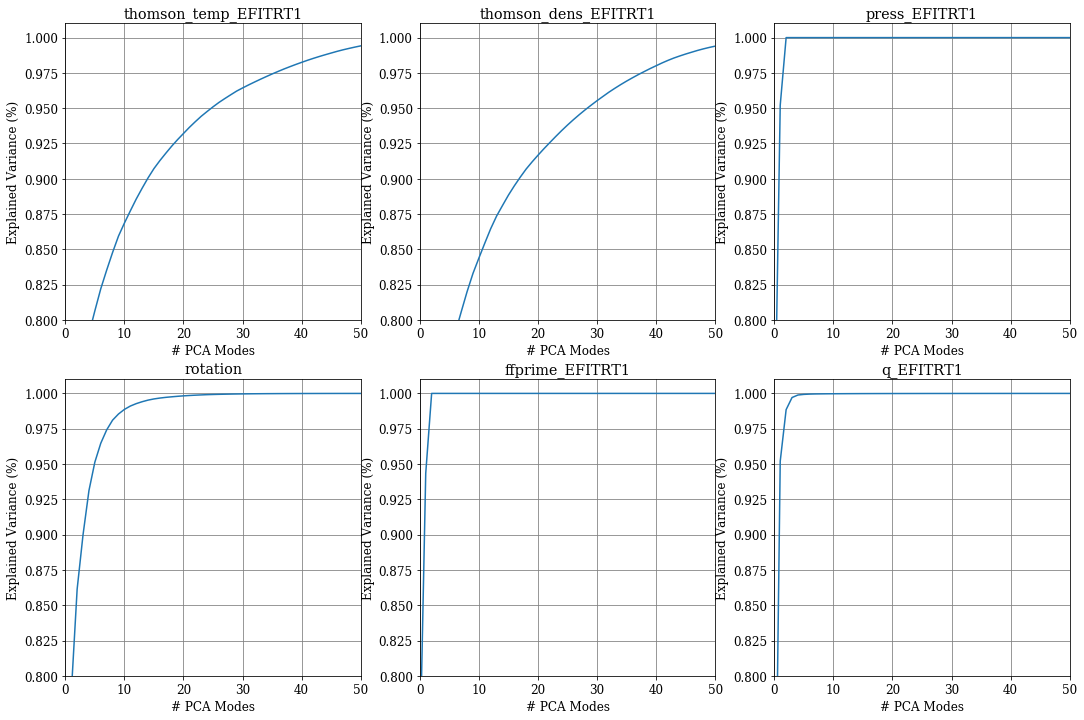

In [24]:
# plot singular values to see how many modes to keep for reduced order model
nrows = 2
ncols = 3
figsize = (ncols*6,nrows*6)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
for i, sig in tqdm(enumerate(profile_names)):
    ax = axes[np.unravel_index(i,(nrows,ncols))]
    ax.plot(svd[sig+'_percentile'])
    ax.title.set_text(sig)
    ax.set_ylim([.80,1.01])
    ax.set_xlim([0,50])
    ax.yaxis.grid(color='gray')
    ax.xaxis.grid(color='gray')
    ax.set_xlabel('# PCA Modes')
    ax.set_ylabel('Explained Variance (%)')

In [25]:
# extract PCA modes
kernels= {}
pca_modes = {}
nmodes = {}
var_cutoff = .99
for sig in profile_names:
    nmodes[sig] = np.nonzero(svd[sig + '_percentile']>var_cutoff)[0][1]
    pca_modes[sig] = svd[sig + '_U'][:,0:nmodes[sig]].T
    kernels[sig] = np.matmul(pca_modes[sig],pca_modes[sig].T)

In [26]:
# form input/output matrices of PCA modes
Xpca = np.concatenate([np.matmul(np.diag(svd[sig + '_S']),
                                 svd[sig + '_V'])[0:nmodes[sig],:] for sig in profile_names],axis=0)
Ypca = np.concatenate([np.matmul(pca_modes[sig],Y[sig]) for sig in profile_names],axis=0)
Upca = np.concatenate([U[sig] for sig in actuator_names],axis=0)

In [27]:
# pinvert input matrix
XU = np.concatenate([Xpca,Upca],axis=0)
AB = np.linalg.lstsq(XU.T,Ypca.T)[0].T
A = AB[:,0:Xfull.shape[0]]
B = AB[:,Xfull.shape[0]:]

In [19]:
Xfull.shape

(390, 32119)

In [15]:
Xfull = np.concatenate([Xval[sig] for sig in profile_names],axis=0)
Yfull = np.concatenate([Yval[sig] for sig in profile_names],axis=0)
Ufull = np.concatenate([Uval[sig] for sig in actuator_names],axis=0)

In [22]:
nsamples = 100

XU = np.concatenate([Xfull,Ufull],axis=0)
from scipy.sparse.linalg import lsmr
AB1 = [lsmr(Xfull[:,:nsamples].T,Yfull[:,:nsamples].T[:,i])[0].T for i in range(Yfull.shape[0])]
AB = np.stack(AB1,axis=1).T
A = AB[:,0:Xfull.shape[0]]
B = AB[:,Xfull.shape[0]:]

KeyboardInterrupt: 

Text(0.5, 1, 'B')

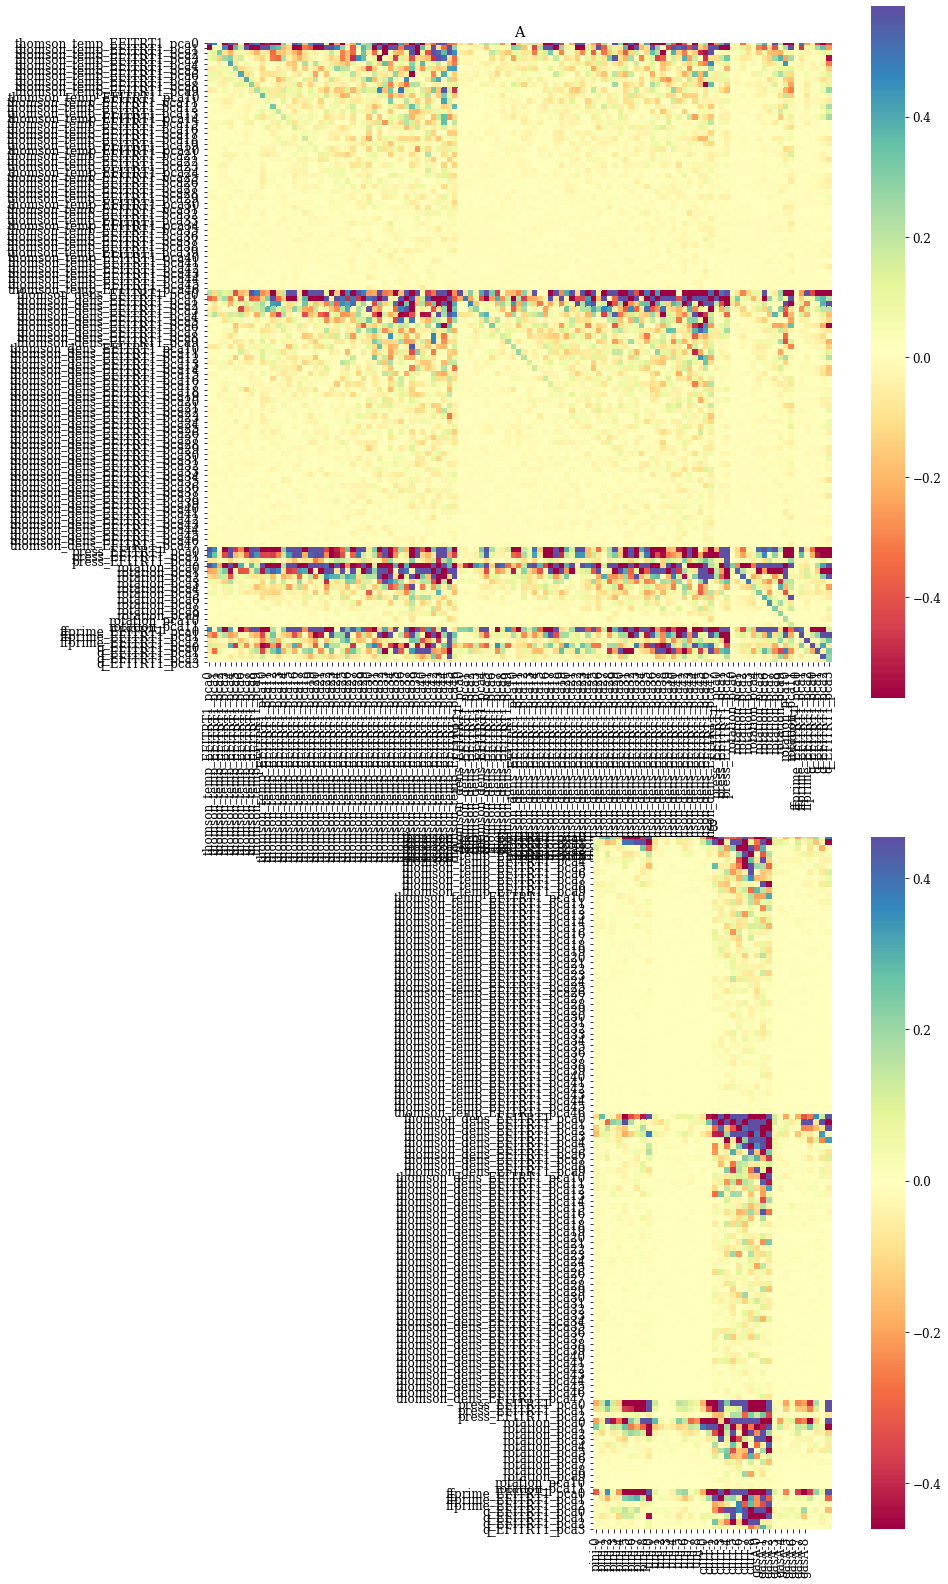

In [28]:
f, axes = plt.subplots(2, 1, figsize=(14, 28))
Aylabel = [sig + '_pca' + str(i) for sig in profile_names for i in range(nmodes[sig]) ]
Axlabel = Aylabel
Bylabel = Aylabel
Bxlabel = [sig + '-' + str(i) for sig in actuator_names for i in range(actuator_lookback + lookahead) ]
cmap='Spectral'
sns.heatmap(A, cmap=cmap, annot=False, square=True, robust=True, 
            xticklabels = Axlabel, yticklabels = Aylabel, ax=axes[0]).set_title('A')
sns.heatmap(B, cmap=cmap, annot=False, square=True, robust=True, 
            xticklabels = Bxlabel, yticklabels = Bylabel, ax=axes[1]).set_title('B')


Text(0, 0.5, 'Im($\\lambda$)')

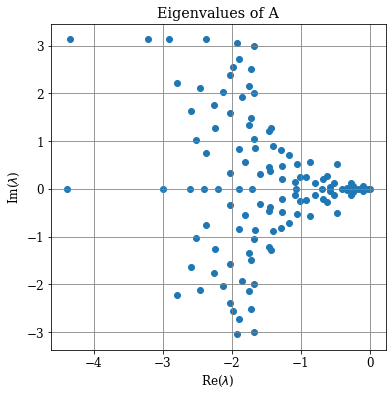

In [29]:
## Plot spectrum of A
eigvals, eigvecs = np.linalg.eig(A)
eigvals = np.log(eigvals)
plt.figure(figsize=(6,6))
plt.scatter(np.real(eigvals),np.imag(eigvals))
plt.title('Eigenvalues of A')
plt.grid(color='gray')
plt.xlabel('Re($\lambda$)')
plt.ylabel('Im($\lambda$)')

In [30]:
## Define some stuff
class linear_model():
    def __init__(self,A,B,pca_modes,profile_names,actuator_names):
        self.A = A
        self.B = B
        self.pca_modes = pca_modes
        self.profile_names = profile_names
        self.actuator_names = actuator_names
        self.which_modes = {}
        i=0
        for sig in self.profile_names:
            self.which_modes[sig] = np.arange(i,i+self.pca_modes[sig].shape[0])
            i = self.which_modes[sig][-1]+1
            
    def predict_on_batch(self,inputs=None, X=None, U=None):
        if inputs is not None and X is None and U is None:
            xinput = np.concatenate([np.matmul(self.pca_modes[sig],inputs[sig]) for sig in self.profile_names])
            uinput = np.concatenate([inputs[sig] for sig in self.actuator_names])
        elif inputs is not None and X is not None and U is None:
            xinput = np.concatenate([np.matmul(self.pca_modes[sig],inputs[sig]) for sig in self.profile_names])
            uinput = np.concatenate([X[sig] for sig in self.actuator_names])
        elif inputs is None and X is not None and U is not None:
            xinput = np.concatenate([np.matmul(self.pca_modes[sig],X[sig]) for sig in self.profile_names])
            uinput = np.concatenate([U[sig] for sig in self.actuator_names])
        else:
            raise ValueError("Must provide either input dictionary or seperate X and U inputs")
        youtput = np.matmul(self.A,xinput) + np.matmul(self.B,uinput)
        prediction = {sig: np.matmul(self.pca_modes[sig].T,youtput[self.which_modes[sig]])
                       for i, sig in enumerate(self.profile_names)}
        return prediction

In [31]:
## Create a model and make some predictions
model = linear_model(A,B,pca_modes,profile_names,actuator_names)
predictions = model.predict_on_batch(X,U)
# predict with input perturbed
predictions_perturbed = model.predict_on_batch(X,{key:val+.5 for key,val in U.items()})

/home/wconlin/.conda/envs/tfgpu/lib/python3.6/site-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


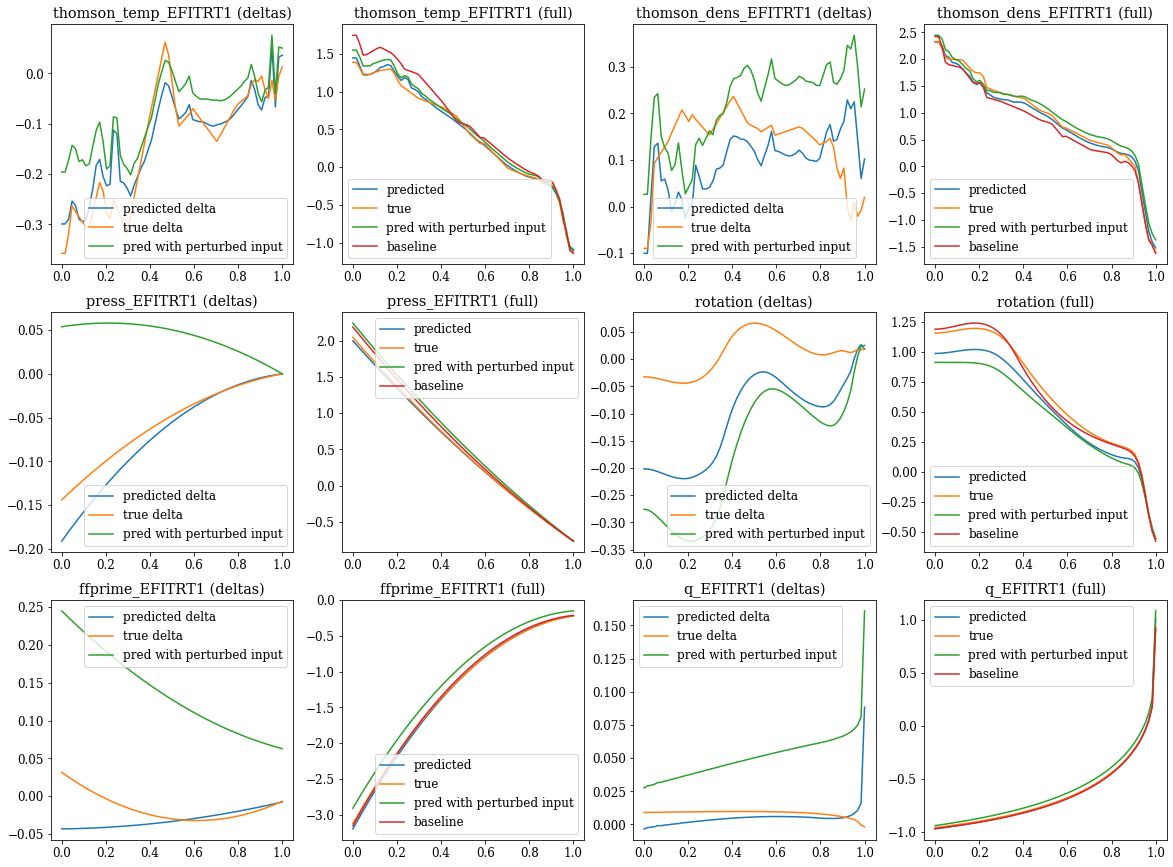

In [32]:
# test: get a set of inputs, predict output, and project back onto PCA
idx = 150
baseline = {sig: X[sig][:,idx] for sig in profile_names}
true = {sig: Y[sig][:,idx] for sig in profile_names}
pred = {sig: predictions[sig][:,idx] for sig in profile_names}
pred_pert = {sig: predictions_perturbed[sig][:,idx] for sig in profile_names}

#plot
psi = np.linspace(0,1,65)
figsize = (4*5,3*5)
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=figsize)
for i, sig in tqdm(enumerate(profile_names)):
        ax[np.unravel_index(2*i,(3,4))].plot(psi,pred[sig]-baseline[sig],
                                             psi,true[sig]-baseline[sig],psi,pred_pert[sig]-baseline[sig])
        ax[np.unravel_index(2*i,(3,4))].title.set_text(sig + ' (deltas)')
        ax[np.unravel_index(2*i,(3,4))].legend(['predicted delta','true delta','pred with perturbed input'])
        ax[np.unravel_index(2*i+1,(3,4))].plot(psi,pred[sig],psi,true[sig],
                                               psi,pred_pert[sig],psi, baseline[sig])
        ax[np.unravel_index(2*i+1,(3,4))].title.set_text(sig + ' (full)')
        ax[np.unravel_index(2*i+1,(3,4))].legend(['predicted','true','pred with perturbed input','baseline'])